In [12]:
import pandas as pd

In [19]:
eem_mezun_sayisi = pd.read_csv("eem_mezun_sayisi.csv" , sep=';')
eem_mezun_sayisi['yas'] = 2016 - eem_mezun_sayisi['yil']
eem_mezun_sayisi

,eem_mezun_sayisi,yil,yas
0,10915,1982,34
1,12844,1984,32
2,14886,1986,30
3,17818,1988,28
4,21022,1990,26
5,24486,1992,24
6,28313,1994,22
7,32128,1996,20
8,36193,1998,18
9,41154,2000,16


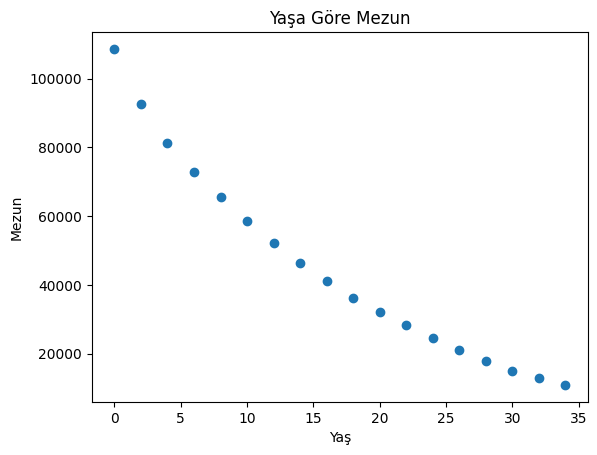

In [34]:
import matplotlib.pyplot as plt

plt.scatter(eem_mezun_sayisi['yas'], eem_mezun_sayisi['eem_mezun_sayisi'])
plt.xlabel('Yaş')
plt.ylabel('Mezun')
plt.title('Yaşa Göre Mezun')
plt.show()

In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(eem_mezun_sayisi[['yas', 'eem_mezun_sayisi']])
eem_mezun_sayisi['küme'] = kmeans.predict(eem_mezun_sayisi[['yas', 'eem_mezun_sayisi']])
eem_mezun_sayisi

,eem_mezun_sayisi,yil,yas,küme
0,10915,1982,34,4
1,12844,1984,32,4
2,14886,1986,30,4
3,17818,1988,28,4
4,21022,1990,26,1
5,24486,1992,24,1
6,28313,1994,22,1
7,32128,1996,20,3
8,36193,1998,18,3
9,41154,2000,16,3


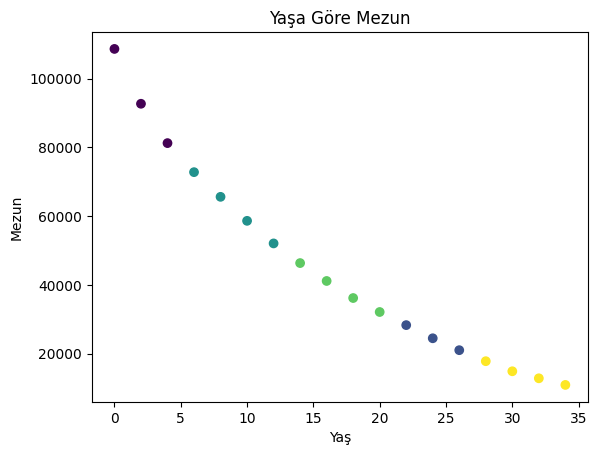

In [33]:
plt.scatter(eem_mezun_sayisi['yas'], eem_mezun_sayisi['eem_mezun_sayisi'], c=eem_mezun_sayisi['küme'])
plt.xlabel('Yaş')
plt.ylabel('Mezun')
plt.title('Yaşa Göre Mezun')
plt.show()

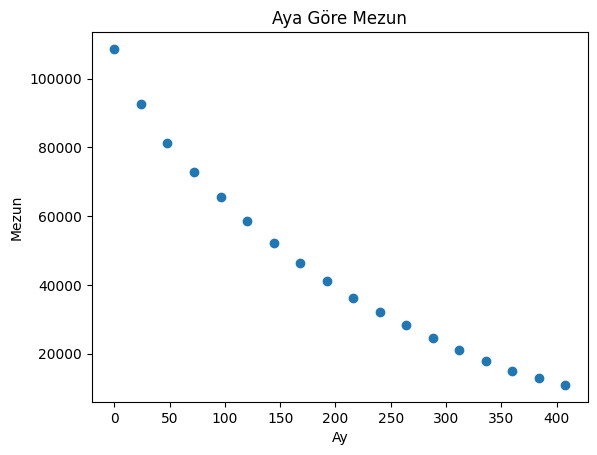

In [32]:
eem_mezun_sayisi['yas_ay'] = eem_mezun_sayisi['yas'] * 12

plt.scatter(eem_mezun_sayisi['yas_ay'], eem_mezun_sayisi['eem_mezun_sayisi'])
plt.xlabel('Ay')
plt.ylabel('Mezun')
plt.title('Aya Göre Mezun')
plt.show()

In [28]:
kmeans2 = KMeans(n_clusters=5)
kmeans2.fit(eem_mezun_sayisi[['yas_ay', 'eem_mezun_sayisi']])
eem_mezun_sayisi['küme2'] = kmeans2.predict(eem_mezun_sayisi[['yas_ay', 'eem_mezun_sayisi']])
eem_mezun_sayisi

,eem_mezun_sayisi,yil,yas,küme,yas_ay,küme2
0,10915,1982,34,4,408,2
1,12844,1984,32,4,384,2
2,14886,1986,30,4,360,2
3,17818,1988,28,4,336,2
4,21022,1990,26,1,312,2
5,24486,1992,24,1,288,2
6,28313,1994,22,1,264,2
7,32128,1996,20,3,240,0
8,36193,1998,18,3,216,0
9,41154,2000,16,3,192,0


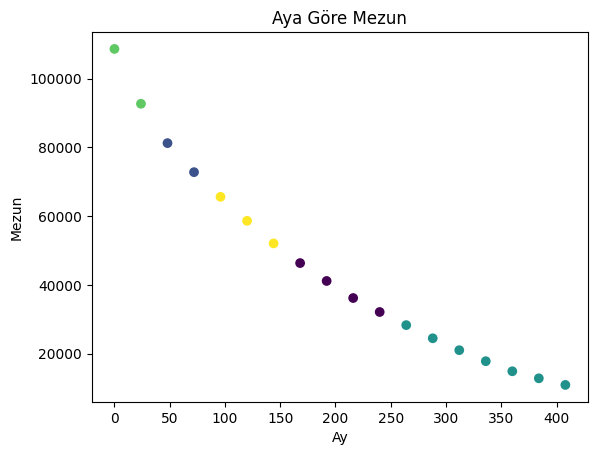

In [36]:
plt.scatter(eem_mezun_sayisi['yas_ay'], eem_mezun_sayisi['eem_mezun_sayisi'], c=eem_mezun_sayisi['küme2'])
plt.xlabel('Ay')
plt.ylabel('Mezun')
plt.title('Aya Göre Mezun')
plt.show()

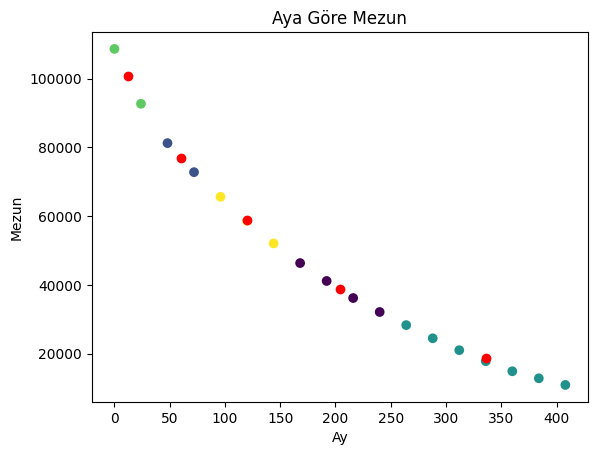

In [37]:
# draw centroids
plt.scatter(eem_mezun_sayisi['yas_ay'], eem_mezun_sayisi['eem_mezun_sayisi'], c=eem_mezun_sayisi['küme2'])
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='red')
plt.xlabel('Ay')
plt.ylabel('Mezun')
plt.title('Aya Göre Mezun')
plt.show()

In [39]:
eem_mezun_sayisi.to_csv('eem_mezun_sayisi.csv', index=False)

In [40]:
# cluster number 1 is çok eski
# cluster number 2 is eski
# cluster number 3 is orta
# cluster number 4 is yeni
# cluster number 5 is çok yeni

eem_mezun_sayisi['YeniOlmaDurumu'] = eem_mezun_sayisi['küme2'].replace({0: 'çok eski', 1: 'eski', 2: 'orta', 3: 'yeni', 4: 'çok yeni'})
eem_mezun_sayisi


,eem_mezun_sayisi,yil,yas,küme,yas_ay,küme2,YeniOlmaDurumu
0,10915,1982,34,4,408,2,orta
1,12844,1984,32,4,384,2,orta
2,14886,1986,30,4,360,2,orta
3,17818,1988,28,4,336,2,orta
4,21022,1990,26,1,312,2,orta
5,24486,1992,24,1,288,2,orta
6,28313,1994,22,1,264,2,orta
7,32128,1996,20,3,240,0,çok eski
8,36193,1998,18,3,216,0,çok eski
9,41154,2000,16,3,192,0,çok eski


In [41]:
eem_mezun_sayisi.to_csv('eem_mezun_sayisi_etiketli.csv', index=False)